$\textbf{Short Description:}$  
This Jupyter notebook primarily focuses on the implementation of Batch Normalization and its application from scratch. The model consists of three blocks, each comprising 20 layers, with Batch Normalization incorporated into every layer. Training was performed using the fashion_mnist dataset. However, due to computational constraints, the model was trained on a reduced-size dataset and for a limited number of epochs. 

# Import libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
# from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

# Load Data
dataset: fashion_mnist. Because of the limitation of computation sources, the size of the dataset['train'] was reduced to 1000 and dataset['test'] was reduced to 200. 

In [9]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Slice the dataset to keep only the first 'num_samples_to_keep' samples
train_numSamples = 1000
test_numSamples = 200
train_images = train_images[:train_numSamples]
train_labels = train_labels[:train_numSamples]
test_images = test_images[:test_numSamples]
test_labels = test_labels[:test_numSamples]

# normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Batch_Normalization 
this part is defining the batchNormalization and train the model with the batch normalization. But because of the limit of computertation, the model was only trained with limited number of epochs. 

In [32]:
class MyBatchNormalization(keras.layers.Layer):
    def __init__(self):
        super(MyBatchNormalization, self).__init__()

    def build(self, input_shape):
        # Initialize alpha and beta
        self.gamma = self.add_weight("gamma", shape=input_shape[1:], initializer="ones", trainable=True)
        self.beta = self.add_weight("beta", shape=input_shape[1:], initializer="zeros", trainable=True)

    def call(self, input):
        train_mean = tf.math.reduce_mean(input, axis=[0, 1, 2], keepdims=True)
        train_var = tf.math.reduce_std(input, axis=[0, 1, 2], keepdims=True)

        input_norm = (input - train_mean) / train_var
        output = self.gamma * input_norm + self.beta   # calculate the output according to the formula
        return output


def define_model():
    inputs = keras.Input(shape=(28,28,1))

    K = 20 # number of convolution layers per block
    L = 3  # number of blocks
    x = inputs
    for i in range(0,L):
        for j in range(0,K):
            # Added call to custom layer here: x = MyBatchNormalization()(x)
            x = MyBatchNormalization()(x)
            x = layers.Conv2D(32, 3, activation="relu",padding="same")(x)
        x = layers.MaxPooling2D(3)(x)
    x = layers.GlobalMaxPooling2D()(x)
    outputs = layers.Dense(10,activation='softmax')(x)

    model = keras.Model(inputs,outputs)
    model.summary() # show model overview
    return model


In [35]:
model_new = define_model()
model_new.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
history = model_new.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(test_images, test_labels))

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 my_batch_normalization_722   (None, 28, 28, 1)        1568      
 (MyBatchNormalization)                                          
                                                                 
 conv2d_720 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 my_batch_normalization_723   (None, 28, 28, 32)       50176     
 (MyBatchNormalization)                                          
                                                                 
 conv2d_721 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 my_batch_normalization_724   (None, 28, 28, 32)       501

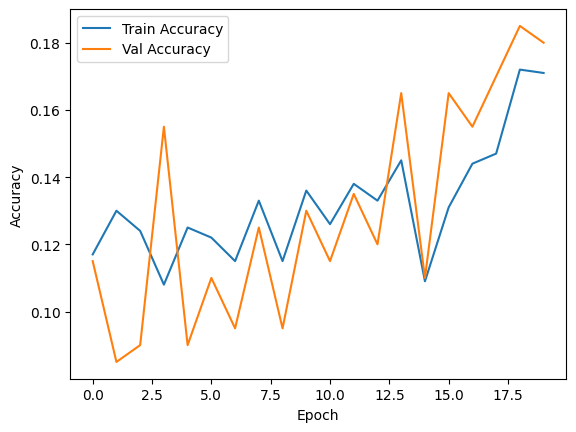

In [36]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

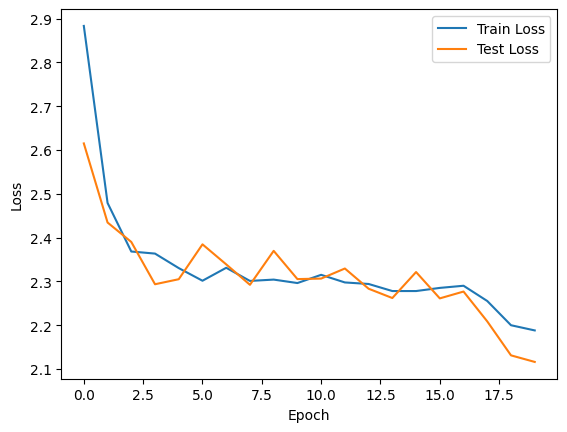

In [37]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()